# **MINI CHALLENGE**

## **Dataset Overview**

### Importing the essential libraries

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore")

# Plot styles to set aesthetic preferences for your visualizations.
sns.set()
plt.style.use('ggplot')

### Importing the dataset

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# metadata
print(banknote_authentication.metadata)

# variable information
print(banknote_authentication.variables)


{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

### Understanding the data

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [ ]:
for column in X.columns:
  print(f"{column}: {X[column].nunique()}")


variance: 1338
skewness: 1256
curtosis: 1270
entropy: 1156


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   1372 non-null   int64
dtypes: int64(1)
memory usage: 10.8 KB


### Dividing the columns into three categories


1.   **Numerical Data:**
      * variance
      * skewness
      * curtosis
      * entropy

2.   **Categorical Data:**
      * Class

3.   **Mixed Data:**
      * None



## **Data Exploration**

### **Exploratory Data Analysis (EDA)**

####**Univariate Analysis**

Univariate analysis focuses on analyzing each feature in the dataset independently.



*   **Distribution analysis:** The distribution of each feature is examined to identify its shape, central tendency, and dispersion
*   **Identifying potential issues:** Univariate analysis helps in identifying potential problems with the data such as outliers, skewness and missing values



##### **Steps of doing Univariate Analysis on Numerical columns**

**Descriptive Statistics:** Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

**Visualizations:** Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

**Data Imbalances**

**Identifying Outliers:** Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

**Skewness:** Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

**Conclusion:** Summarize the findings of the EDA and make decisions about how to proceed with further analysis.

##### **Numerical Variables**

**Automation Function for Univariate Analysis Of Numerical Features**

In [ ]:
def analyze_numerical_feature(df, feature):
    # Statistical summary and skewness
    stats = df[feature].describe()
    skewness = df[feature].skew()
    missing_values = df[feature].isnull().sum()  # Calculate missing values

    # Set up a canvas for plotting
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram
    axs[0, 0].hist(df[feature].dropna(), bins=20, color='skyblue', edgecolor='black')  # Exclude missing values
    axs[0, 0].set_title(f'Histogram of {feature}')
    axs[0, 0].set_xlabel(feature)
    axs[0, 0].set_ylabel('Frequency')

    # KDE Plot
    sns.kdeplot(df[feature].dropna(), ax=axs[0, 1], color='purple', fill=True)  # Exclude missing values
    axs[0, 1].set_title(f'KDE Plot of {feature}')
    axs[0, 1].set_xlabel(feature)
    axs[0, 1].set_ylabel('Density')

    # Boxplot
    sns.boxplot(x=df[feature], ax=axs[1, 0], color='lightgreen')
    axs[1, 0].set_title(f'Boxplot of {feature}')
    axs[1, 0].set_xlabel(feature)

    # Key Metrics
    axs[1, 1].axis('off')  # Turn off the axis
    textstr = (
        f"### Key Metrics ###\n\n"
        f"{stats.to_string()}\n\n"
        f"Skewness: {skewness:.2f}\n"
        f"Missing Values: {missing_values}"
    )
    axs[1, 1].text(
        0.5, 0.5, textstr, fontsize=12, ha='center', va='center',
        bbox=dict(boxstyle="round", facecolor="lightgrey")
    )

    # Adjust layout
    plt.tight_layout()
    plt.show()


###### **variance**

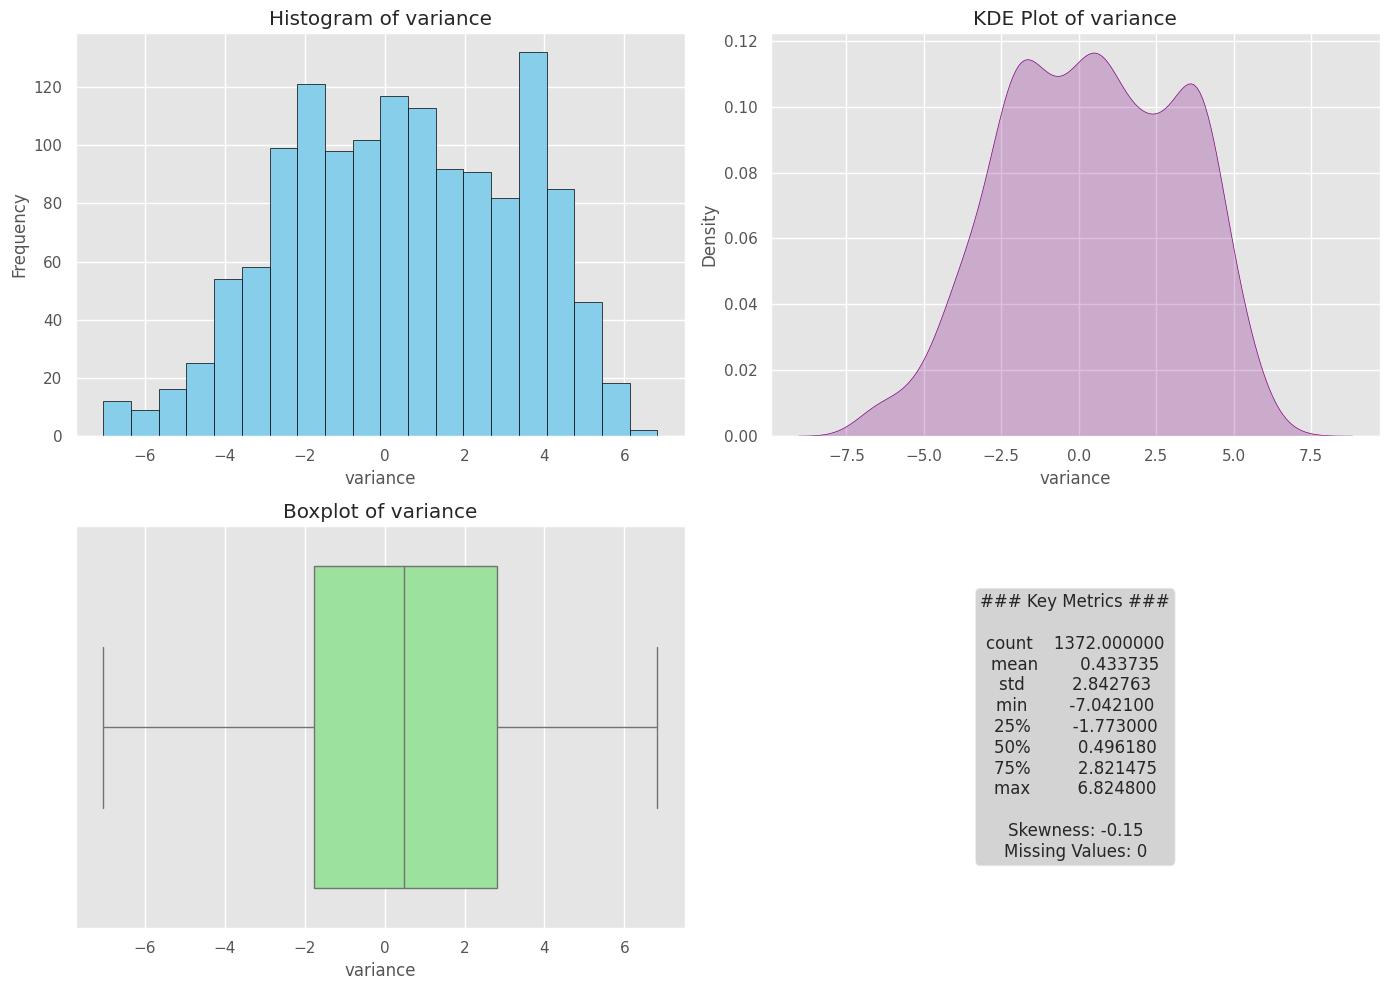

In [ ]:
analyze_numerical_feature(X,'variance')

######  **skewness**

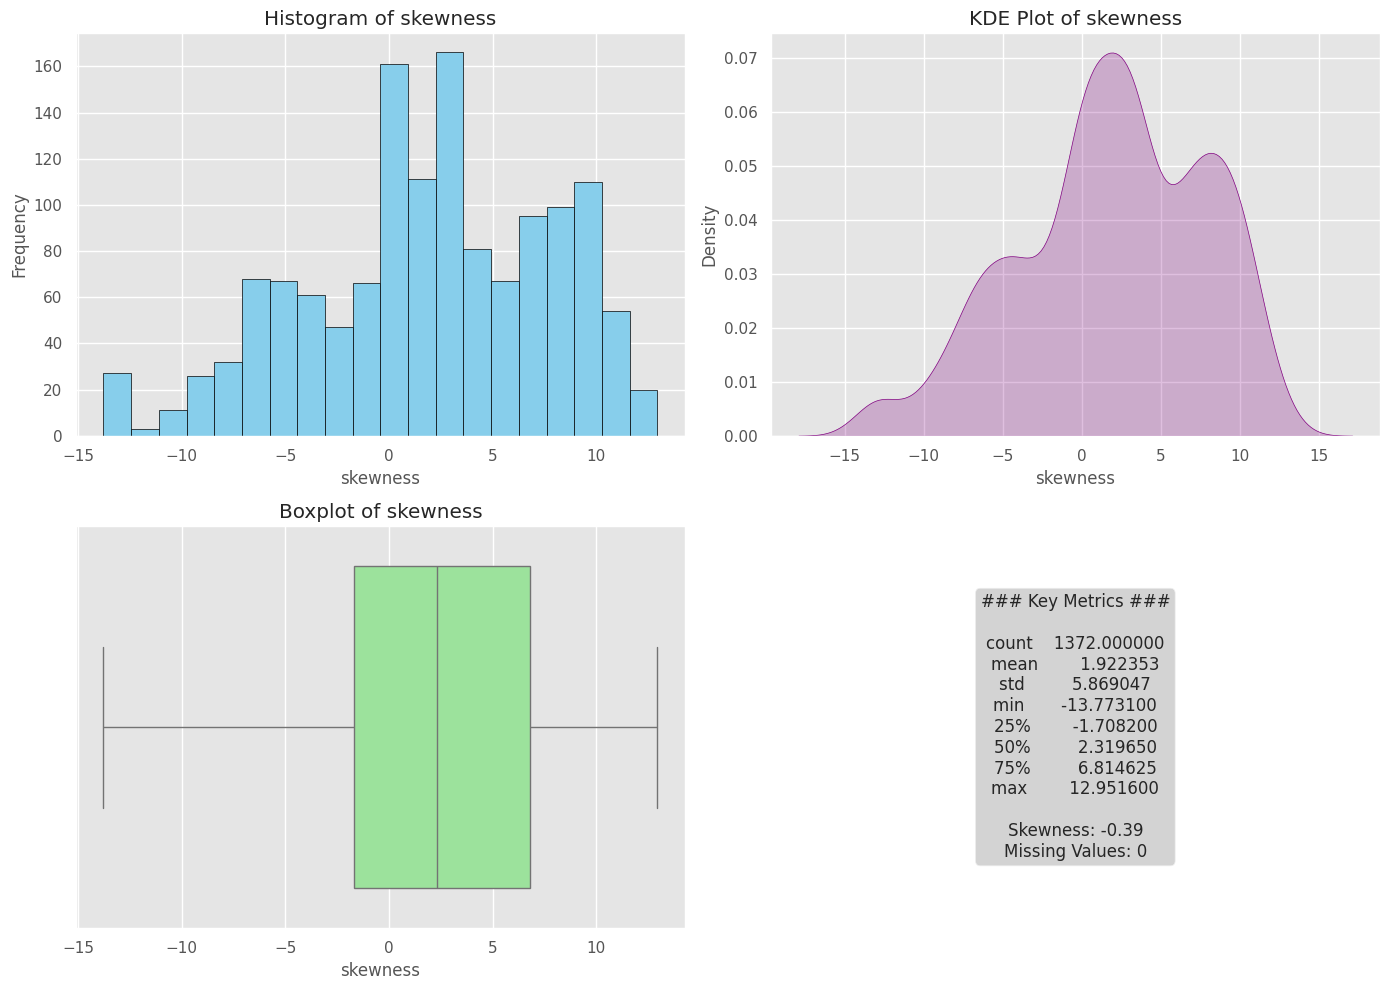

In [ ]:
analyze_numerical_feature(X, 'skewness')

###### **curtosis**

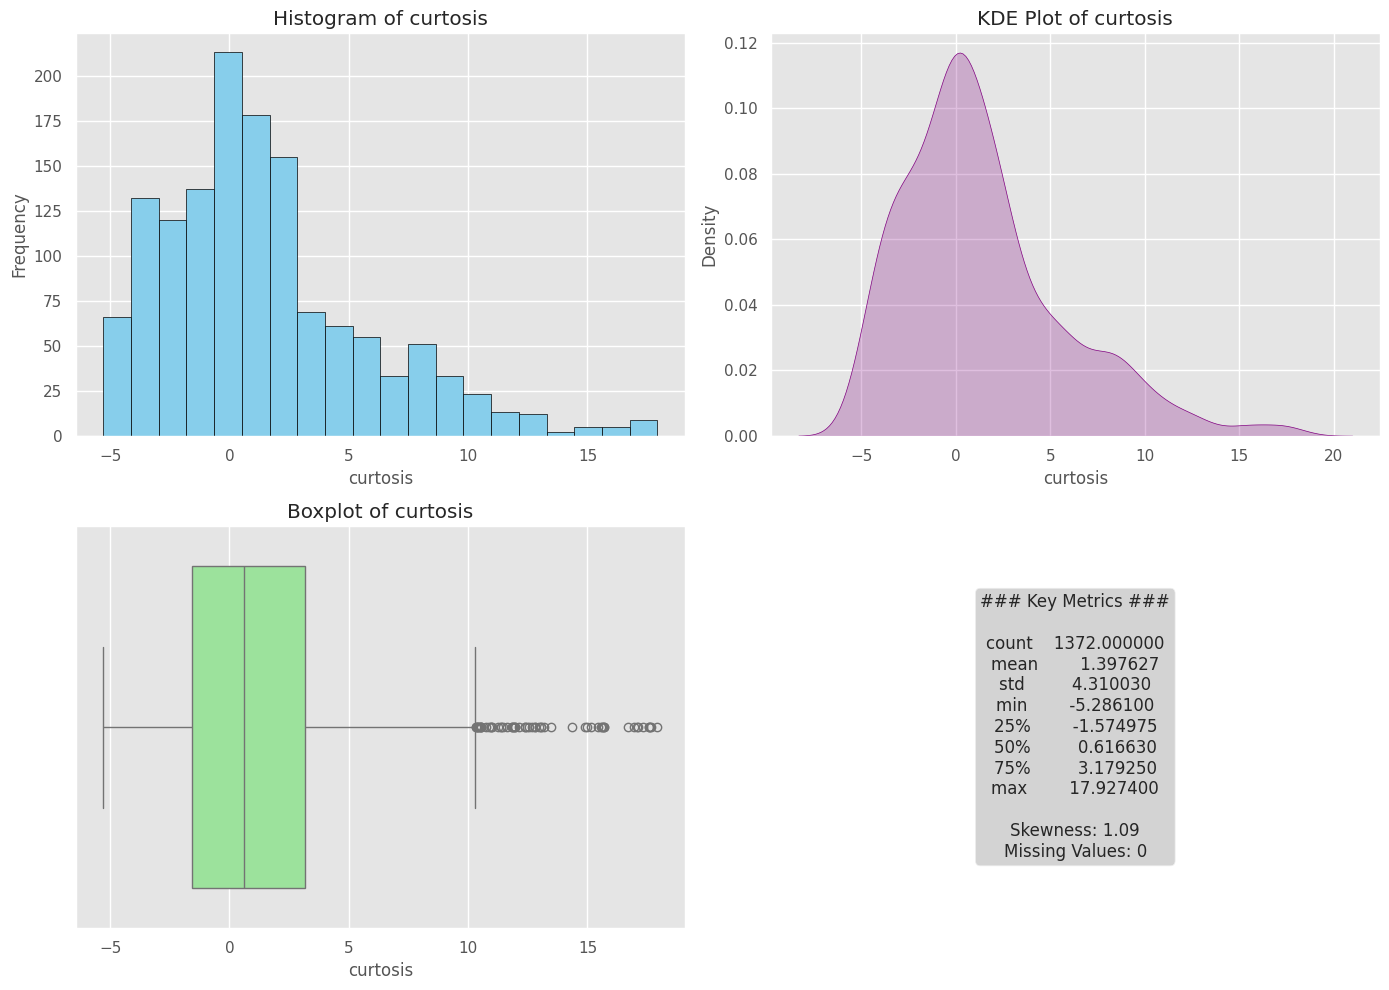

In [ ]:
analyze_numerical_feature(X,'curtosis')

###### **entropy**

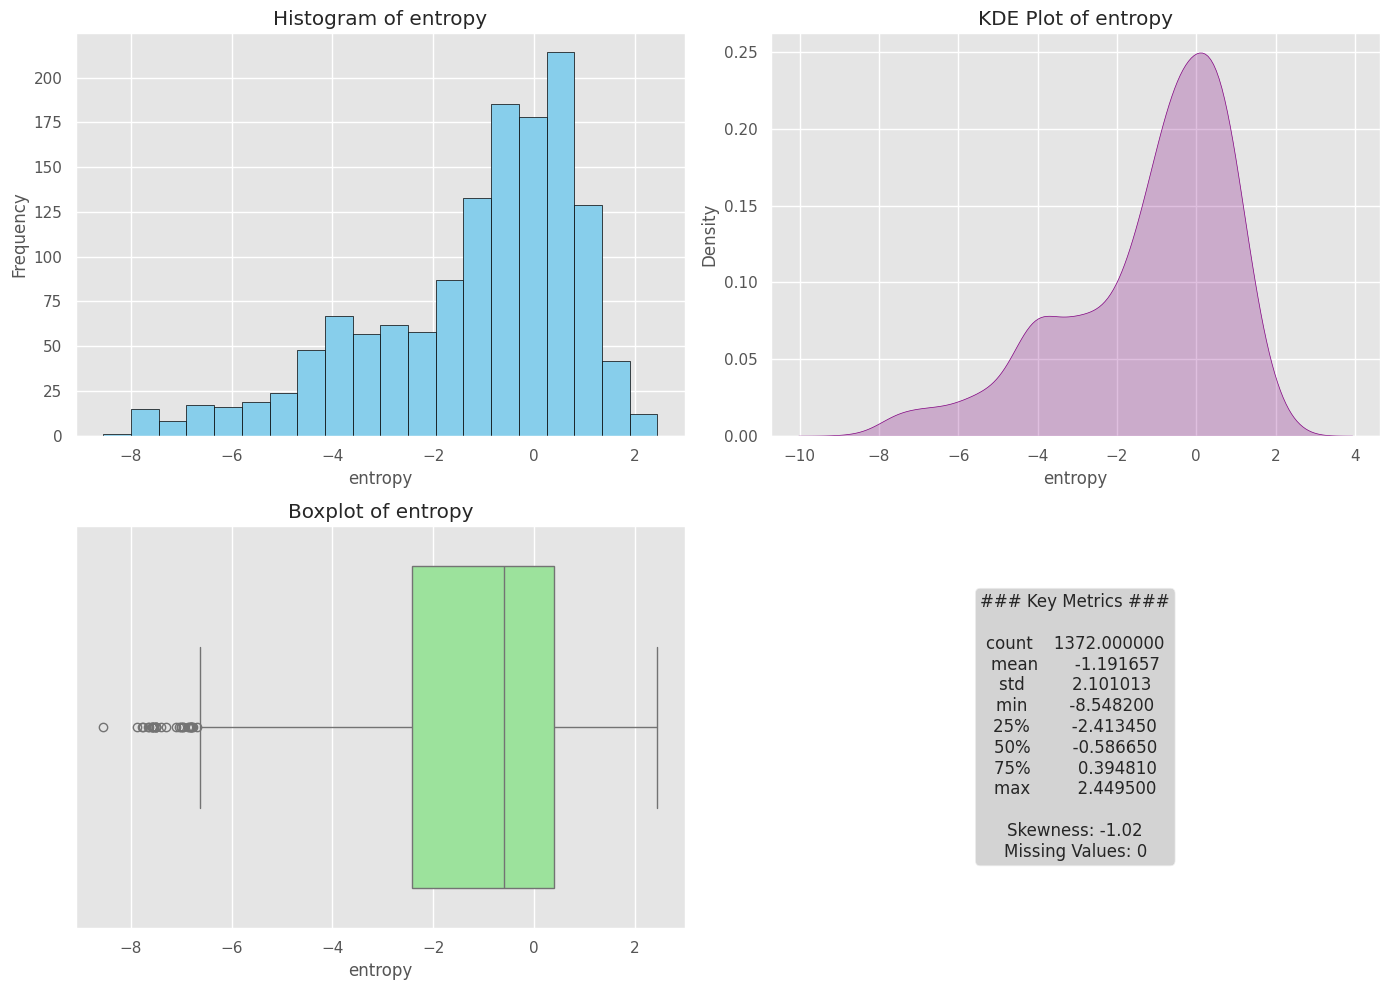

In [ ]:
analyze_numerical_feature(X,'entropy')

##### **Categorical Variables**

**Automation Function for Univariate Analysis Of Categorical Features**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_categorical_variable(df, column):
    """
    Perform univariate analysis for a categorical variable in a presentable manner.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        column (str): The column name of the categorical variable to analyze.
    """
    # Value counts
    value_counts = df[column].value_counts()
    missing_values = df[column].isnull().sum()

    # Set up subplots for bar and pie charts
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Bar Plot
    value_counts.plot(kind='bar', color='skyblue', ax=axs[0])
    axs[0].set_title(f'Bar Plot of {column}', fontsize=14)
    axs[0].set_xlabel(column, fontsize=12)
    axs[0].set_ylabel('Frequency', fontsize=12)

    # Pie Chart
    value_counts.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green', 'yellow', 'orange', 'skyblue', 'violet', 'pink'], ax=axs[1])
    axs[1].set_title(f'Pie Chart of {column}', fontsize=14)
    axs[1].set_ylabel('')  # Remove y-label for the pie chart

    # Summary Box
    axs[2].axis('off')  # Turn off the axis
    summary_text = f"### Analysis of '{column}' ###\n\n"
    summary_text += "Value Counts:\n"
    summary_text += "\n".join([f"{index}: {value}" for index, value in value_counts.items()])
    summary_text += f"\n\nMissing Values: {missing_values}"
    axs[2].text(0.5, 0.5, summary_text, fontsize=12, ha='center', va='center',
                bbox=dict(boxstyle="round", facecolor="lightgrey"))

    # Adjust layout
    plt.tight_layout()
    plt.show()


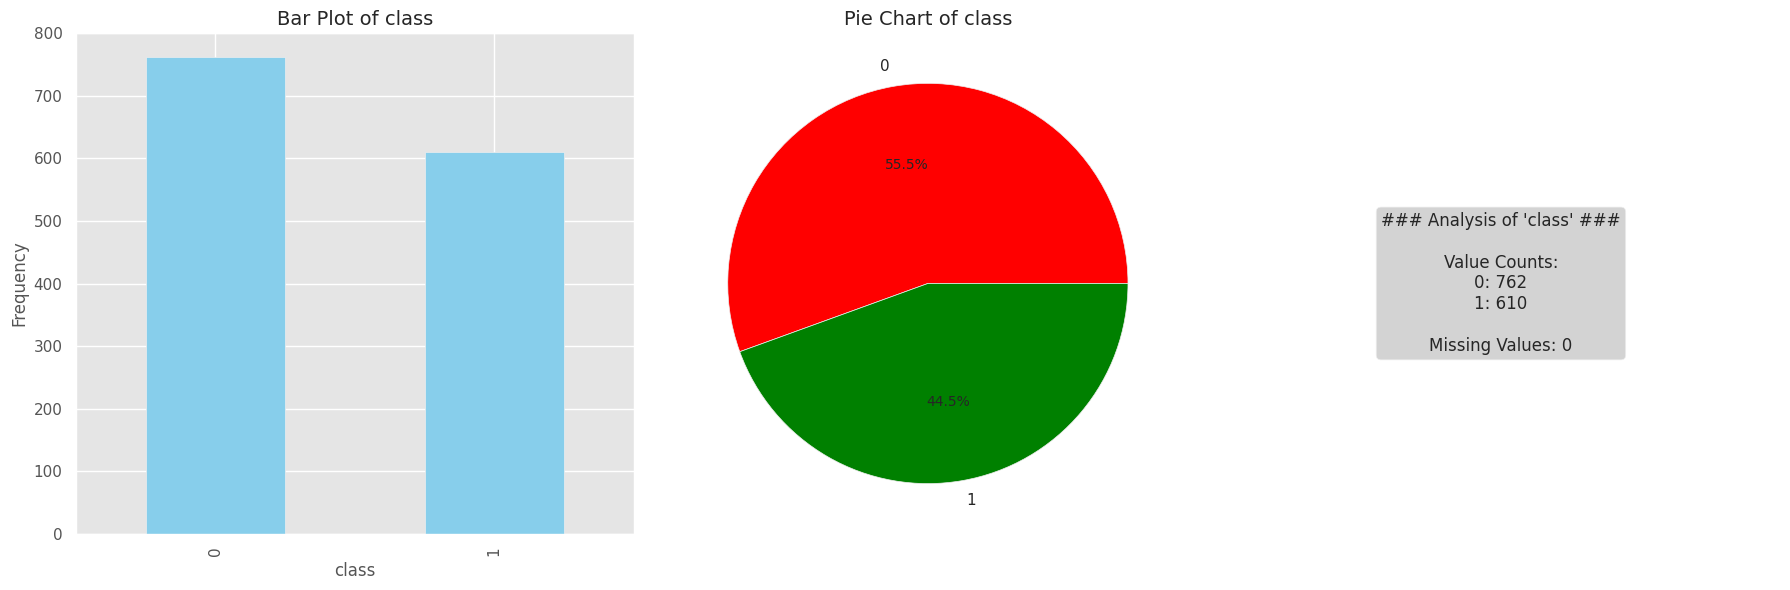

In [ ]:
analyze_categorical_variable(y,'class')

#### **Bivariate Analysis**


##### **Steps of doing Bivariate Analysis**

- Select 2 cols
- Understand type of relationship
    1. **Numerical - Numerical**<br>
        a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots<br>
        b. Check correlation coefficent to check linear relationship
    2. **Numerical - Categorical** - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.<br>
        a. You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots. Scatterplots are not as much beneficial<br>
    3. **Categorical - Categorical**<br>
        a. You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.<br>
        b. You can plots like heatmap, stacked barplots, treemaps


##### **First Type: Numerical-Numerical**

**Function For Bivariate Analysis of Numerical-Numerical Combination Of Features**

In [ ]:

def bivariate_analysis_numerical_numerical(df, feature1, feature2):
    """
    Perform bivariate analysis between two numerical features, displaying only
    the scatter plot and the correlation coefficient, with different colors for each feature.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        feature1 (str): The column name of the first numerical feature.
        feature2 (str): The column name of the second numerical feature.
    """
    # Calculate correlation coefficient
    correlation_coefficient = df[[feature1, feature2]].corr().iloc[0, 1]

    # Set up a canvas for plotting with a smaller figure size
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Define unique colors for the features
    feature1_color = 'skyblue'
    feature2_color = 'orange'

    # Scatter Plot with Regression Line and Different Colors
    sns.regplot(x=feature1, y=feature2, data=df, ax=axs[0], scatter_kws={'alpha': 0.6, 'color': feature1_color}, line_kws={'color': feature2_color})
    axs[0].set_title(f'Scatterplot with Regression: {feature1} vs {feature2}', fontsize=14)
    axs[0].set_xlabel(feature1, fontsize=12)
    axs[0].set_ylabel(feature2, fontsize=12)

    # Display Correlation Coefficient with different color text
    axs[1].axis('off')  # Turn off the axis
    textstr = f"### Correlation Analysis ###\n\nCorrelation Coefficient: {correlation_coefficient:.2f}"
    axs[1].text(0.5, 0.5, textstr, fontsize=14, ha='center', va='center', bbox=dict(boxstyle="round", facecolor="lightgreen"))

    # Adjust layout
    plt.tight_layout()
    plt.show()


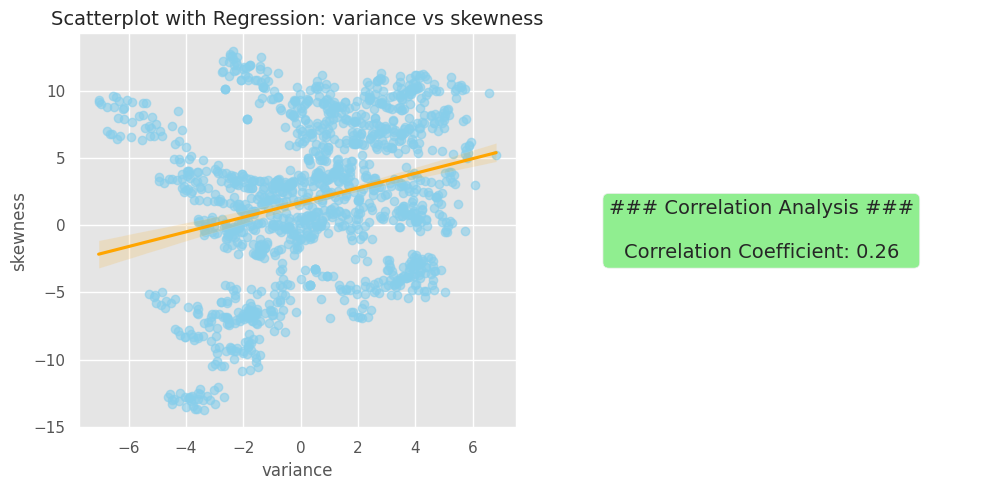

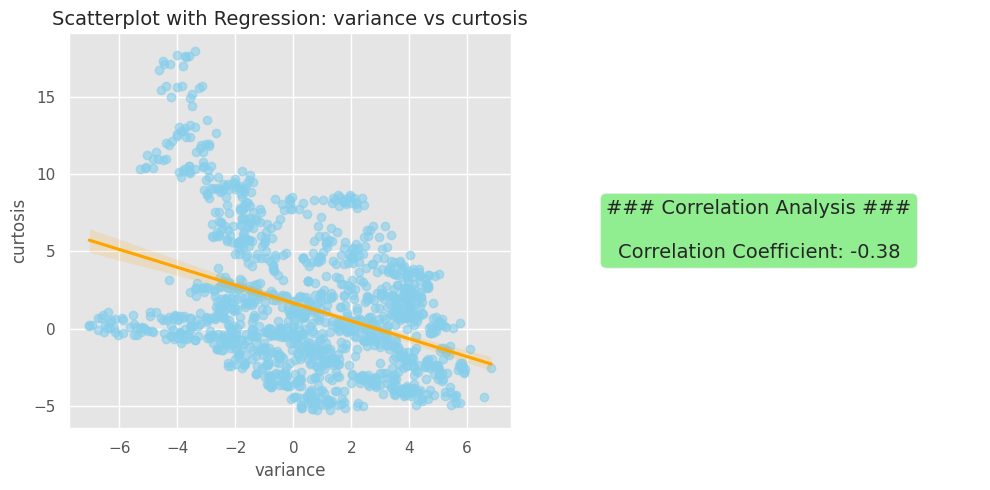

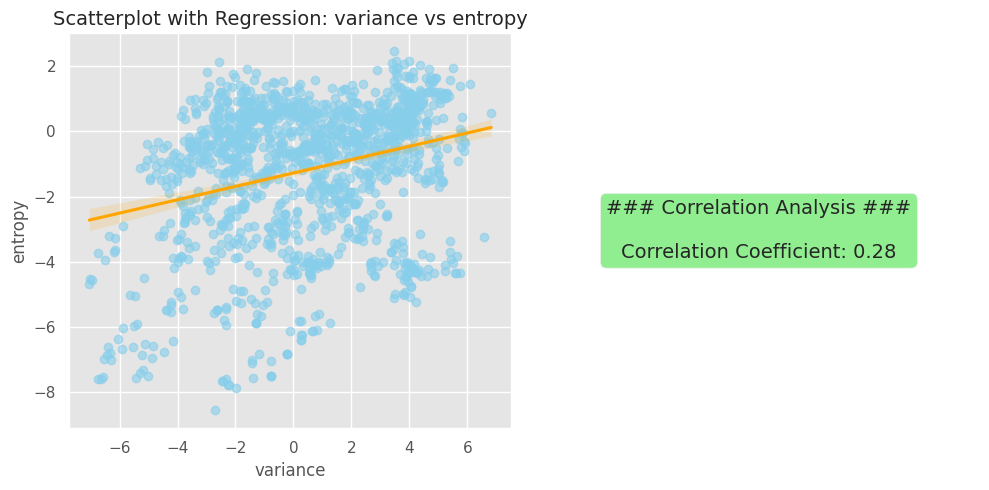

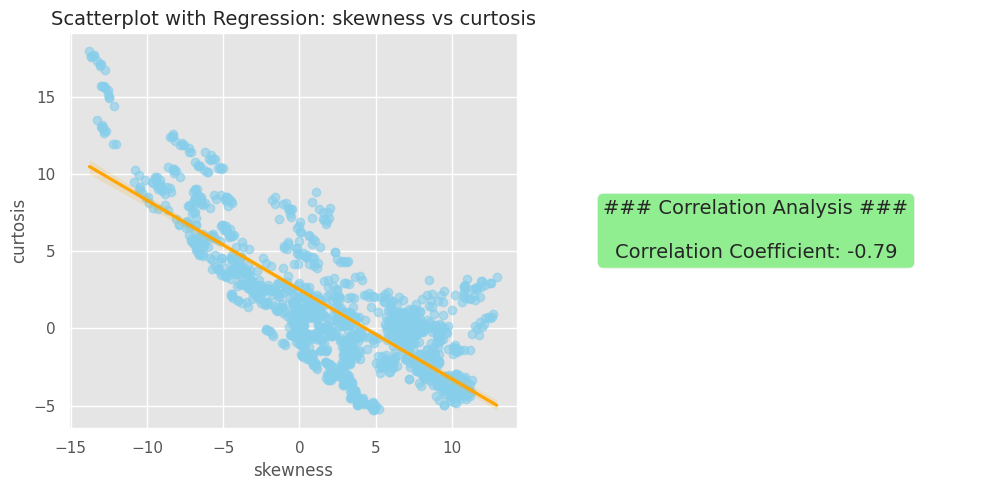

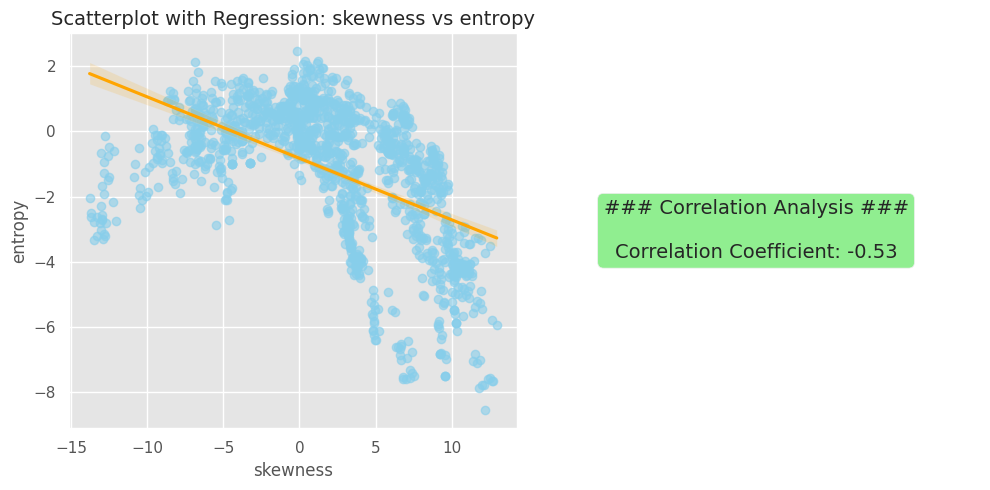

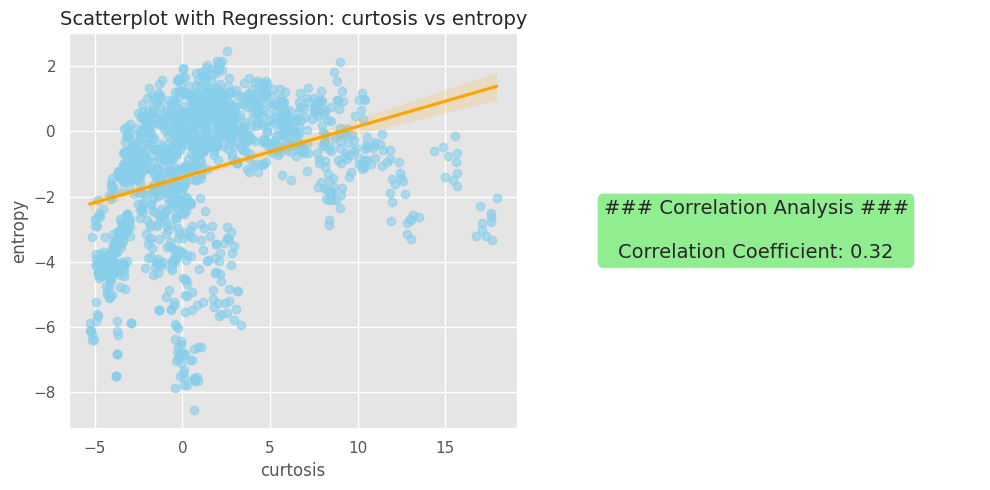

In [ ]:
# List of numerical features
numerical_features = [
    'variance', 'skewness', 'curtosis', 'entropy'
]

# Loop through all pairs of numerical features and call the analysis function
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        feature1 = numerical_features[i]
        feature2 = numerical_features[j]
        bivariate_analysis_numerical_numerical(X, feature1, feature2)


##### **Second Type: Numerical-Categorical**

**Funtion For Bivariate Analysis of Numerical- Categorical Combination Of Features**

In [ ]:
def bivariate_analysis_numerical_categorical(X, feature_of_X, y, feature_of_y):
    """
    Perform bivariate analysis between a numerical feature in X and a categorical feature in y.

    Parameters:
        X (pd.DataFrame): The dataframe containing numerical features.
        feature_of_X (str): The column name of the numerical feature in X.
        y (pd.DataFrame or pd.Series): The dataframe or series containing the categorical feature.
        feature_of_y (str): The column name of the categorical feature in y (if y is a dataframe).
    """
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Ensure y is a dataframe if it's a series
    if isinstance(y, pd.Series):
        y = y.to_frame(name=feature_of_y)

    # Merge X and y for analysis
    df = pd.concat([X, y], axis=1)

    # Set up a canvas for plotting
    fig, axs = plt.subplots(3, 1, figsize=(14, 16))  # 3 rows, 1 column layout

    # Bar Plot
    sns.barplot(x=feature_of_y, y=feature_of_X, data=df, ax=axs[0], ci=None, palette='Set2')
    axs[0].set_title(f'Bar Plot: {feature_of_X} by {feature_of_y}', fontsize=14)
    axs[0].set_xlabel(feature_of_y, fontsize=12)
    axs[0].set_ylabel(feature_of_X, fontsize=12)

    # Box Plot
    sns.boxplot(x=feature_of_y, y=feature_of_X, data=df, ax=axs[1], palette='Set3')
    axs[1].set_title(f'Box Plot: {feature_of_X} by {feature_of_y}', fontsize=14)
    axs[1].set_xlabel(feature_of_y, fontsize=12)
    axs[1].set_ylabel(feature_of_X, fontsize=12)

    # KDE Plot
    for category in df[feature_of_y].dropna().unique():
        subset = df[df[feature_of_y] == category]
        sns.kdeplot(subset[feature_of_X], ax=axs[2], label=str(category), fill=True)
    axs[2].set_title(f'KDE Plot: {feature_of_X} by {feature_of_y}', fontsize=14)
    axs[2].set_xlabel(feature_of_X, fontsize=12)
    axs[2].set_ylabel('Density', fontsize=12)
    axs[2].legend(title=feature_of_y)

    # Adjust layout
    plt.tight_layout()
    plt.show()


**variance by class**

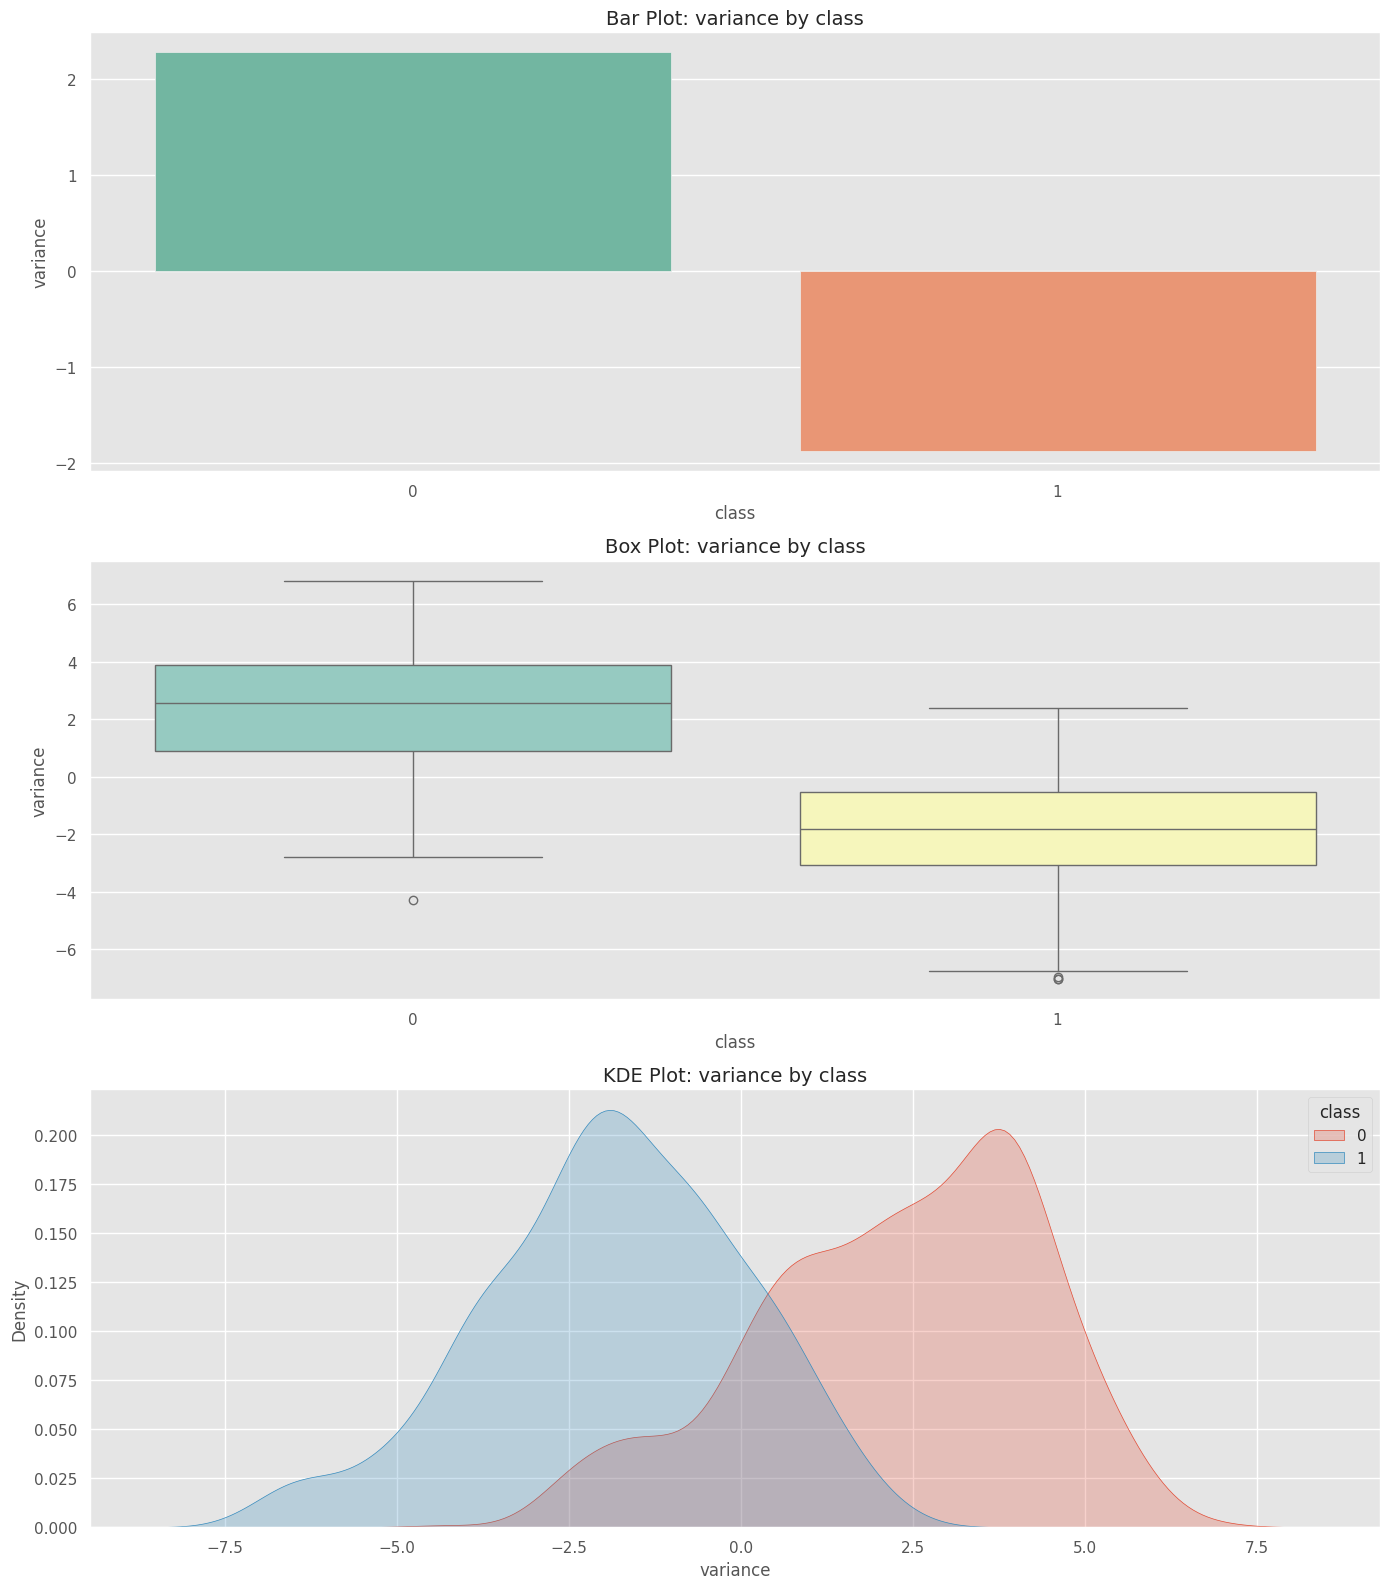

In [ ]:
bivariate_analysis_numerical_categorical(X, 'variance', y, 'class')

**skewnwss by class**

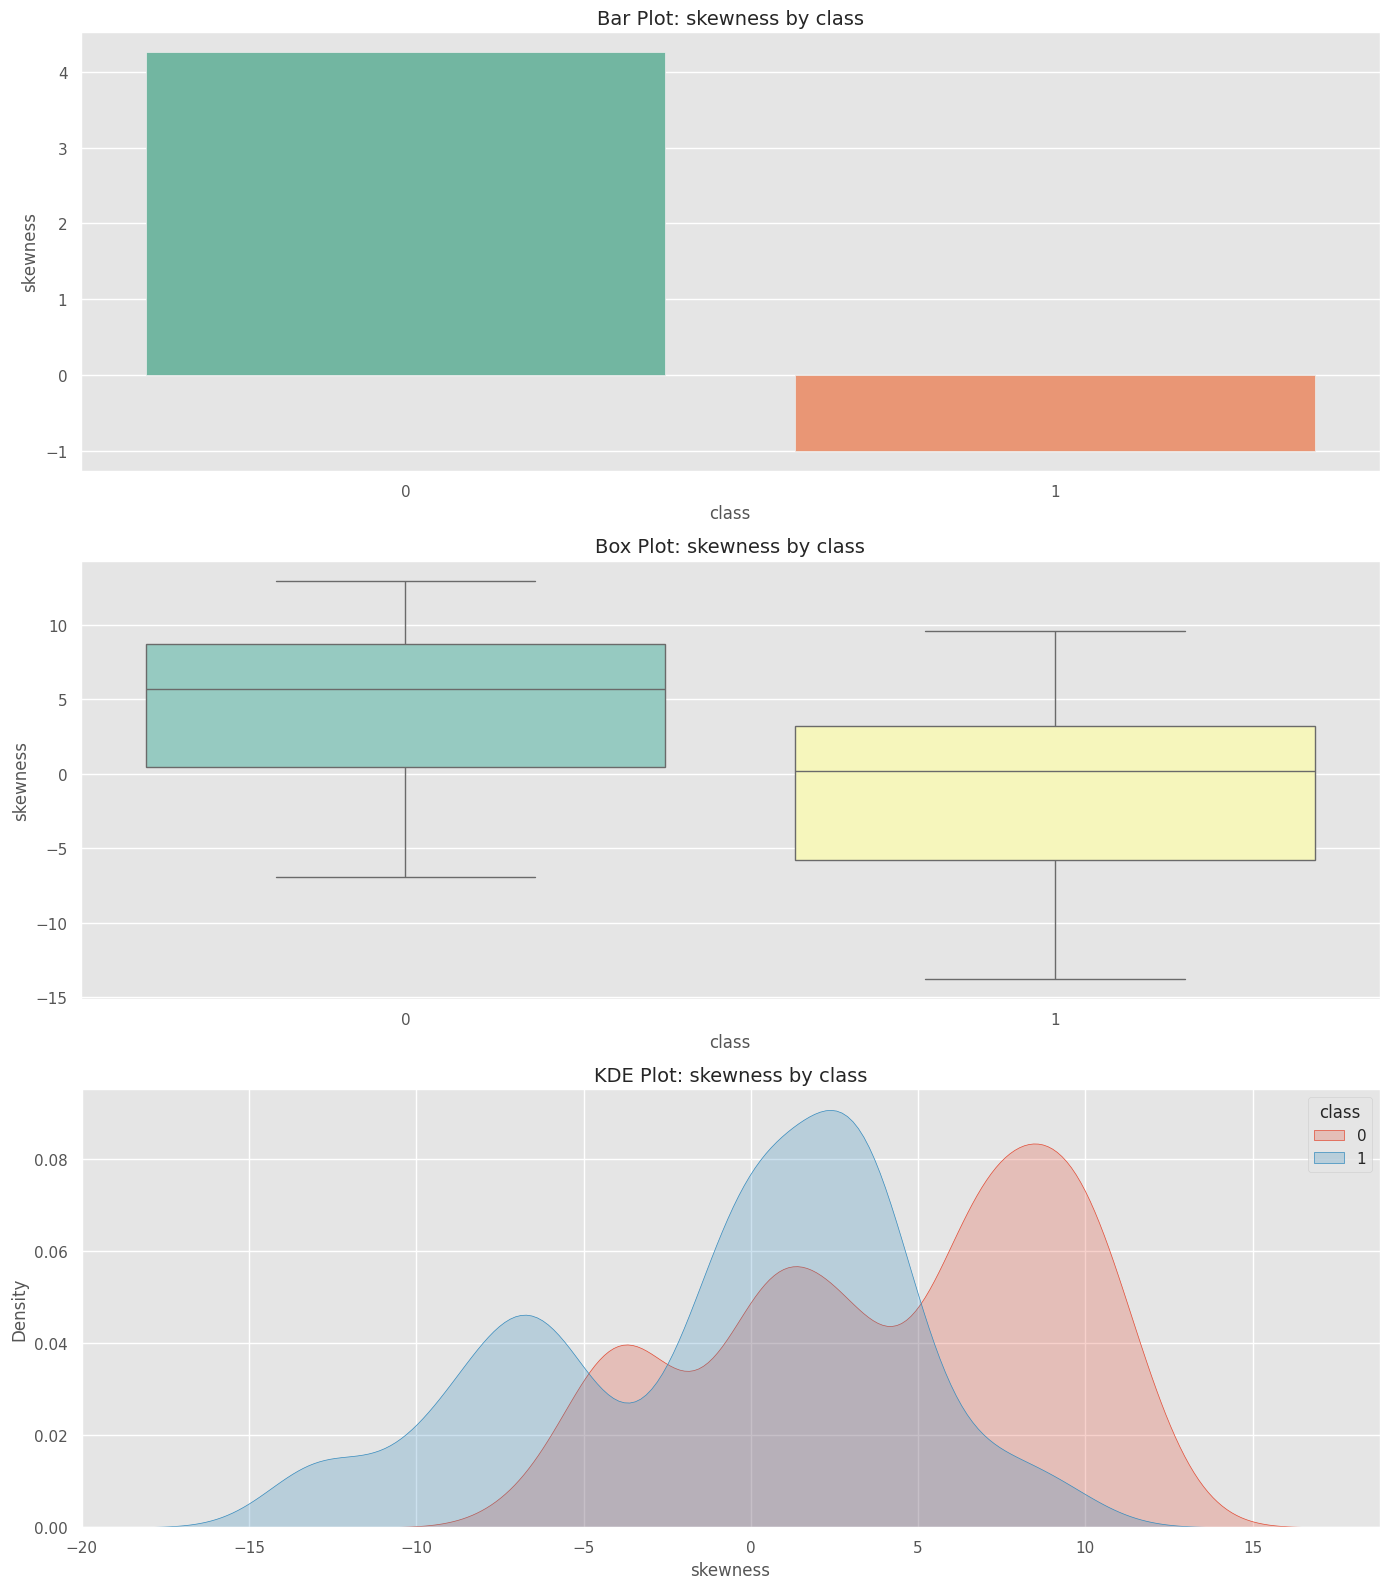

In [ ]:
bivariate_analysis_numerical_categorical(X, 'skewness', y, 'class')

**curtosis by class**

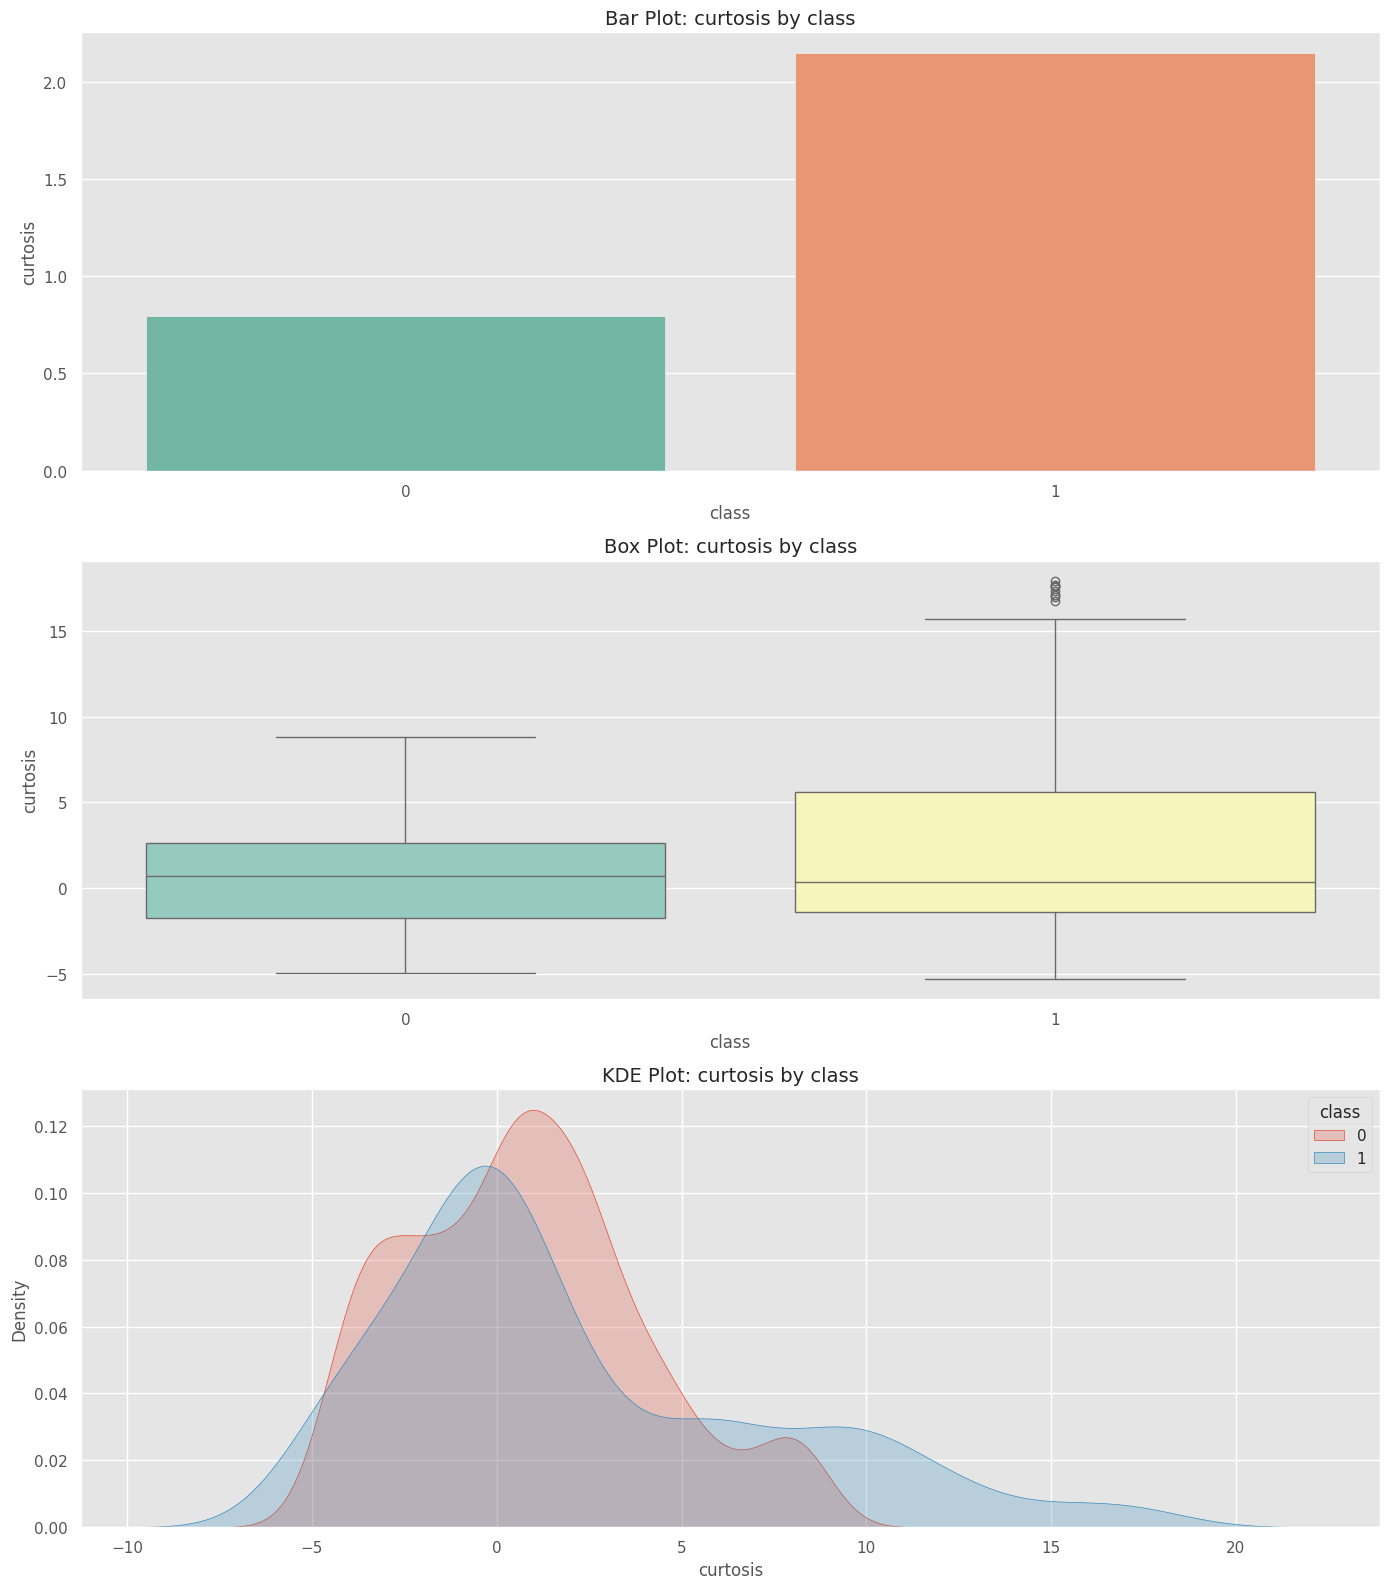

In [ ]:
bivariate_analysis_numerical_categorical(X, 'curtosis', y, 'class')

**entropy by class**

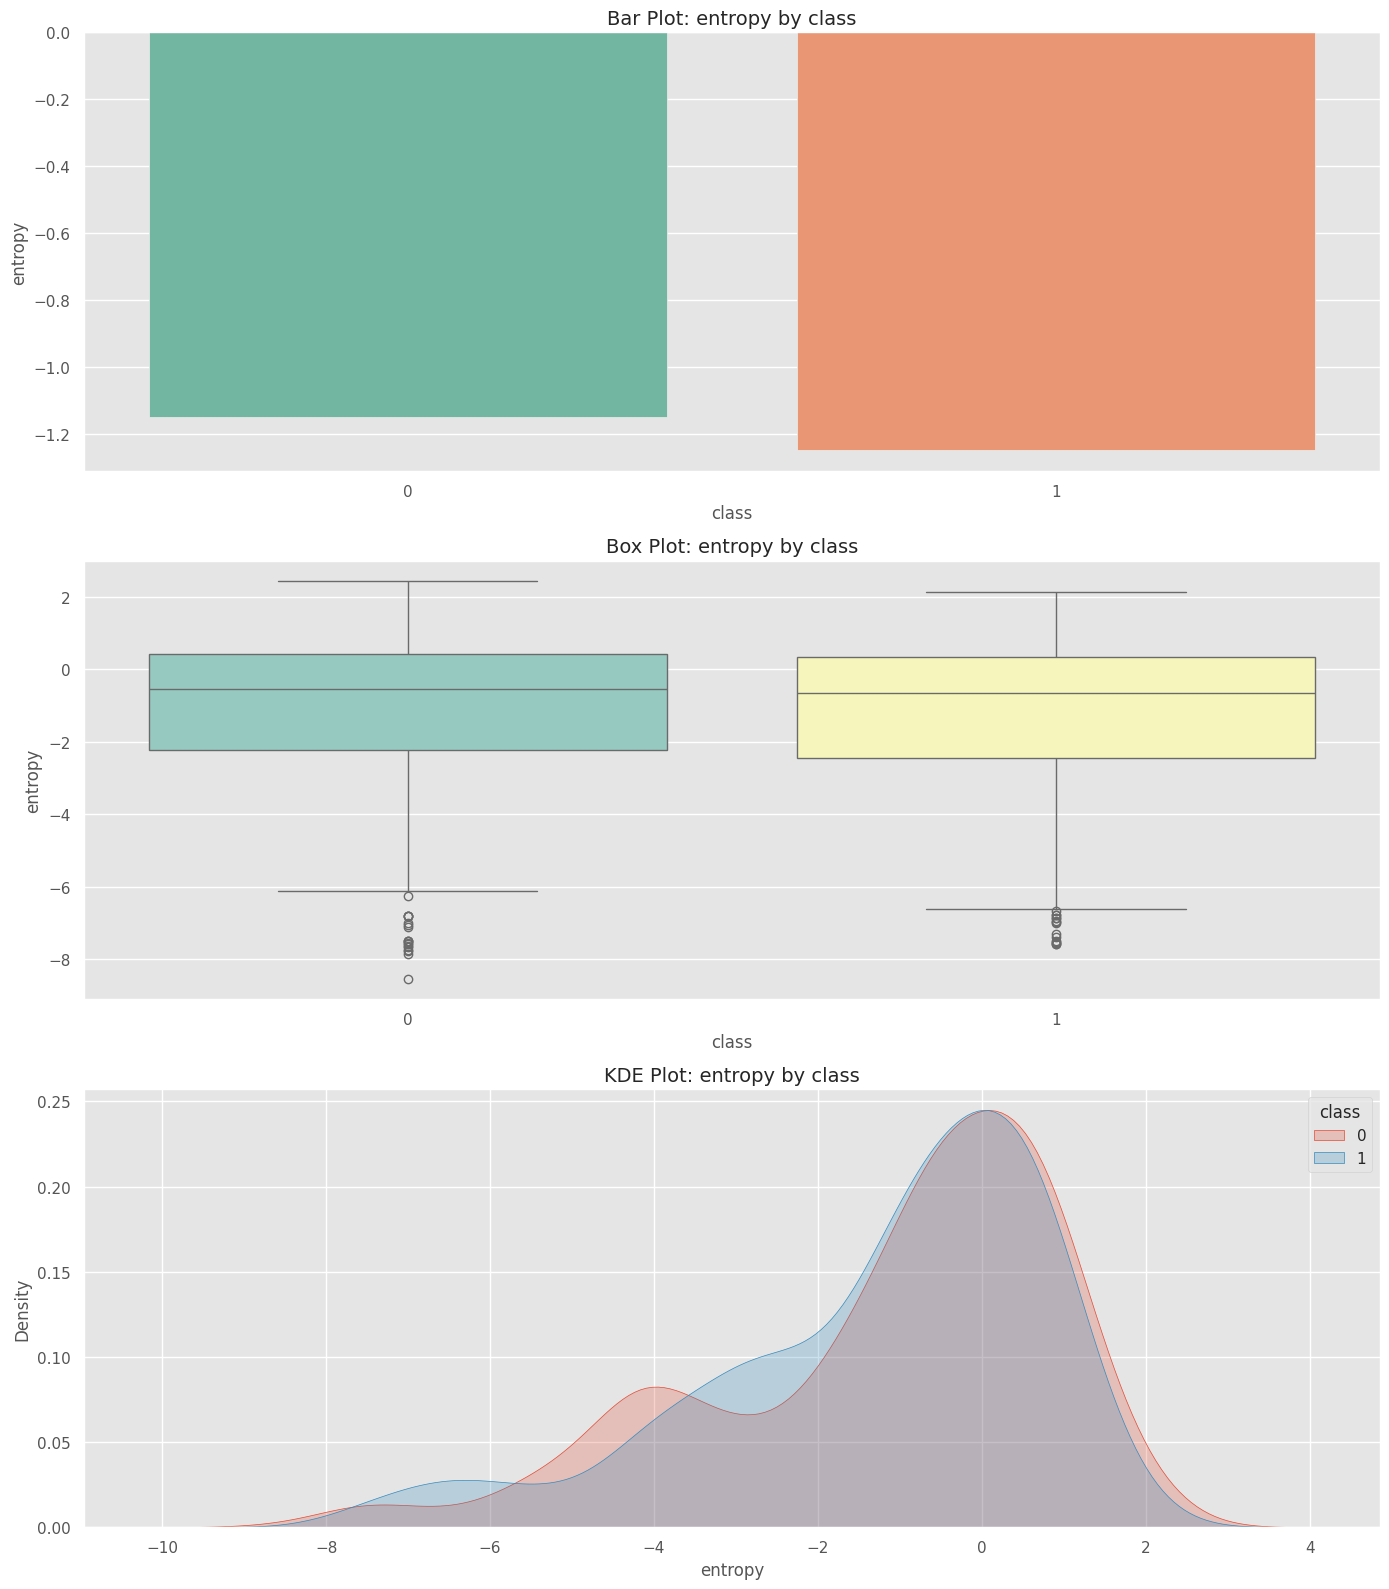

In [ ]:
bivariate_analysis_numerical_categorical(X, 'entropy', y, 'class')

### **Investigation Of Correlation Matrix**

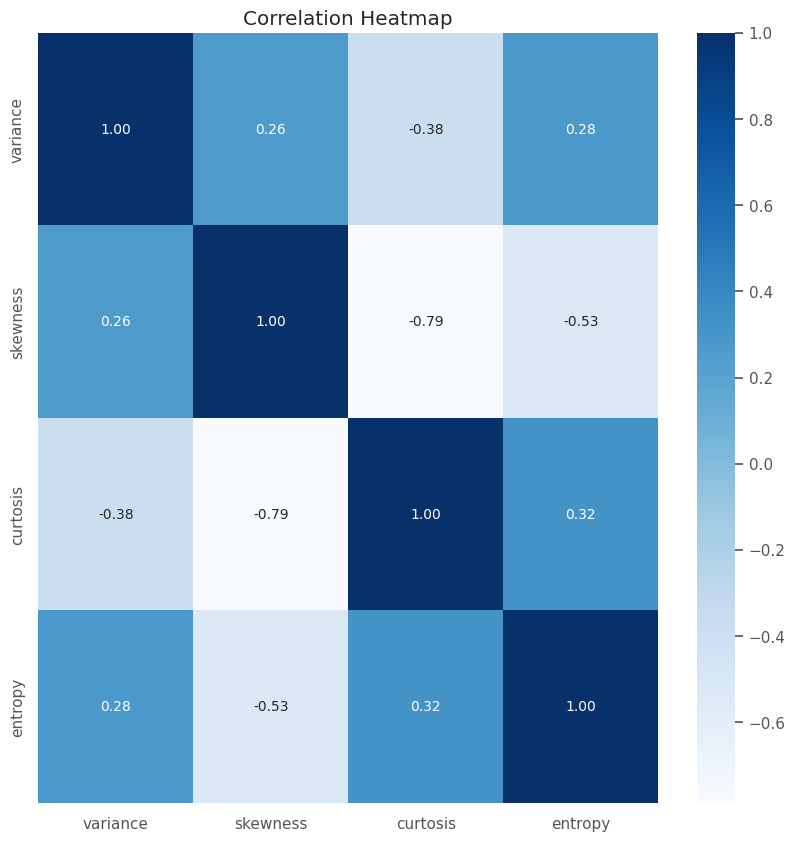

In [ ]:
corr = X.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

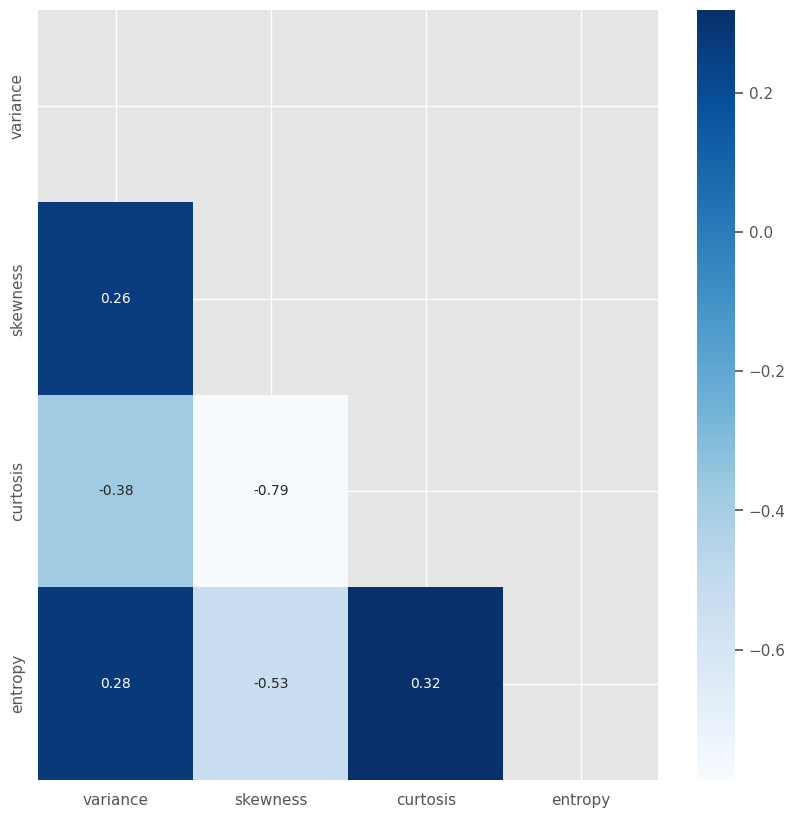

In [ ]:
# Generate a correlation matrix
corr = X.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking, cmap='Blues')
plt.show()

### **Data Imbalance**

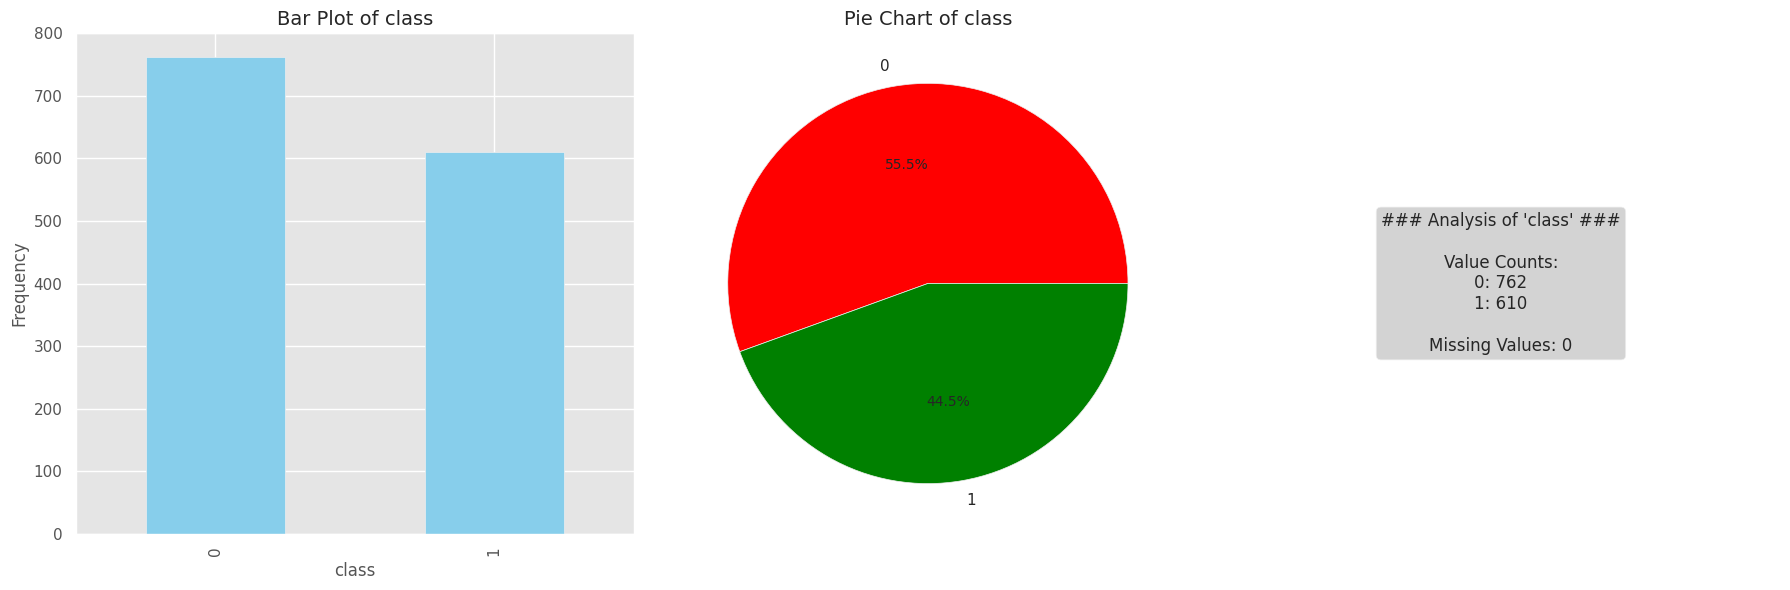

In [ ]:
analyze_categorical_variable(y,'class')

In [ ]:
# calculating the imbalance ratio of Class
class_counts = y['class'].value_counts()


majority_class = class_counts.max()
minority_class = class_counts.min()

#  Calculate the imbalance ratio
imbalance_ratio = majority_class / minority_class

imbalance_ratio

1.2491803278688525

##### **Analyzing Class Imbalance Ratio**
* IR = 1: Perfectly balanced dataset
* 1 < IR ≤ 3: Mild imbalance
* IR > 3: Significant imbalance


---


**According to this, our data is nearly perfect balanced**


---



## **Preprocessing**

**Creating a copy of dataset df as df_copy**

---



In [ ]:
X_copy = X.copy()
y_copy = y.copy()

#### **Handling Missing Data And Duplicated Data**

**Dealing With Nulls**

**From EDA, it is evident that there is no missing value in the data in the numerical features.**

---



In [ ]:
X.isnull().sum()

,0
variance,0
skewness,0
curtosis,0
entropy,0


In [ ]:
y.isnull().sum()

,0
class,0


In [ ]:
y.head()

,class
0,0
1,0
2,0
3,0
4,0


In [ ]:
y.value_counts()

,count
class,
0,762
1,610


In [ ]:
# printing the no of rows with 1 , number of rows with 0, and number of rows containing null
print(f"Number of rows with 1: {y[y['class'] == 1].shape[0]}")
print(f"Number of rows with 0: {y[y['class'] == 0].shape[0]}")
print(f"Number of rows with null: {y[y['class'].isnull()].shape[0]}")



Number of rows with 1: 610
Number of rows with 0: 762
Number of rows with null: 0


**Dealing With Duplicates In X**

---



In [ ]:
X.duplicated().sum()

24

In [ ]:
# checking for duplicated rows
X[X.duplicated()]

,variance,skewness,curtosis,entropy
47,-0.7869,9.5663,-3.7867,-7.5034
139,-0.2062,9.2207,-3.7044,-6.8103
190,0.9297,-3.7971,4.6429,-0.2957
195,-1.8584,7.8860,-1.6643,-1.8384
226,0.5706,-0.0248,1.2421,-0.5621
268,0.9297,-3.7971,4.6429,-0.2957
284,-1.3000,10.2678,-2.9530,-5.8638
300,0.3292,-4.4552,4.5718,-0.9888
315,0.3292,-4.4552,4.5718,-0.9888
320,0.5195,-3.2633,3.0895,-0.9849


In [ ]:
# percentage of dupplicated rows
percentage_duplicates = (X.duplicated().sum() / X.shape[0]) * 100
percentage_duplicates

1.749271137026239

**As the percentage of the duplicates is very less, so ignoring these duplicates**

---



In [ ]:
# shape before dropping
print("Dataset before dropping duplicates: ")
print(X.shape)

Dataset before dropping duplicates: 
(1372, 4)


In [ ]:
y.shape

(1372, 1)

#### **Visualizing The Features Using Scatter Plots or pair plots**

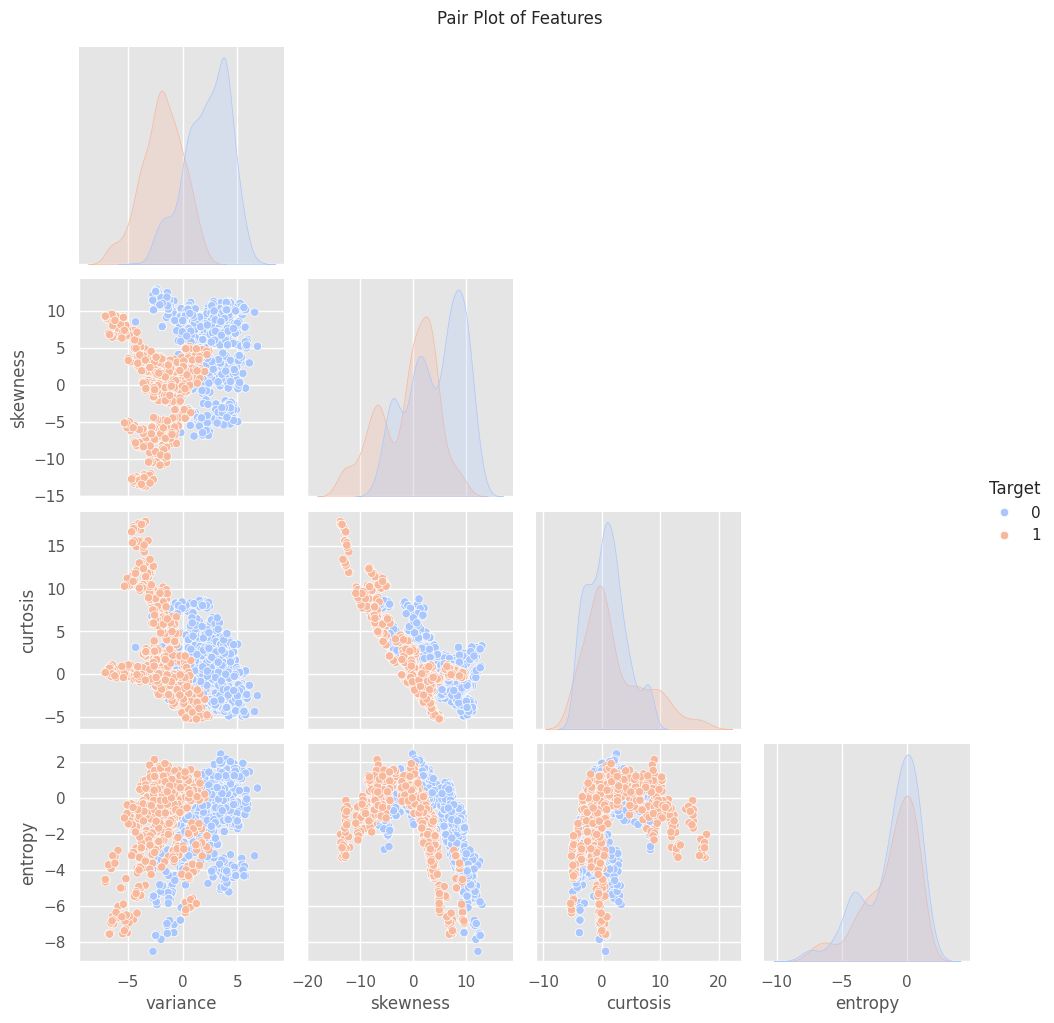

In [ ]:
import seaborn as sns

# Combine X and y into a single DataFrame for pair plot
data = X.copy()
data['Target'] = y['class']

# Pair plot with color-coding based on the target
sns.pairplot(data, hue='Target', palette='coolwarm', diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


#### **Feature Scaling Using Standard Scalar**

Feature Scaling is an important step because it is evident in the univariate analysis that most of the features contains alot of outliers but those outliers are present in clusters form. They will definetely play a significant role in predicting outcome. Feature Scaling will help us to cope up with this problem to some extent.

In [ ]:

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the scaled data
X_scaled.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


#### **Encoding Categorical Variables**

**All features are in float and integer, so no encoding required**

---



#### **Outlier Detection**




it is evident in the univariate analysis that most of the features contains alot of outliers but those outliers are present in clusters form. They will definetely play a significant role in predicting outcome.

Strategy for outliers here a threshold for the outliers will be defined for filtering them out of the data. The Boxplots in the univariate analysis have given fair enough idea about the outliers.

In [ ]:
from scipy import stats

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(X.select_dtypes(include=np.number)))

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Identify rows with outliers in any column
outlier_rows = np.where(z_scores > threshold)

# Get the indices of the rows containing outliers
outlier_indices = list(set(outlier_rows[0]))

# printing the number of rows containing outliers
print("Number of rows containing outliers:", len(outlier_indices))

Number of rows containing outliers: 36


In [ ]:
# calculating the percentage of outliers with complete dataset
percentage_outliers = (len(outlier_indices) / len(X)) * 100
percentage_outliers

2.623906705539359

**Merging X and y**

In [ ]:
# Merge X and y
df = pd.concat([X, y], axis=1)

In [ ]:
# shape of data with the outliers
print("Dataset with outliers: ")
print(df.shape)

Dataset with outliers: 
(1372, 5)


**Dropping The Outliers**

In [ ]:
# dropping the outliers
df_without_outliers = df.drop(index=df.index[outlier_indices])

In [ ]:
# shape of data without the outliers
print("Dataset without outliers: ")
print(df_without_outliers.shape)

Dataset without outliers: 
(1336, 5)


#### **Feature Engineering**

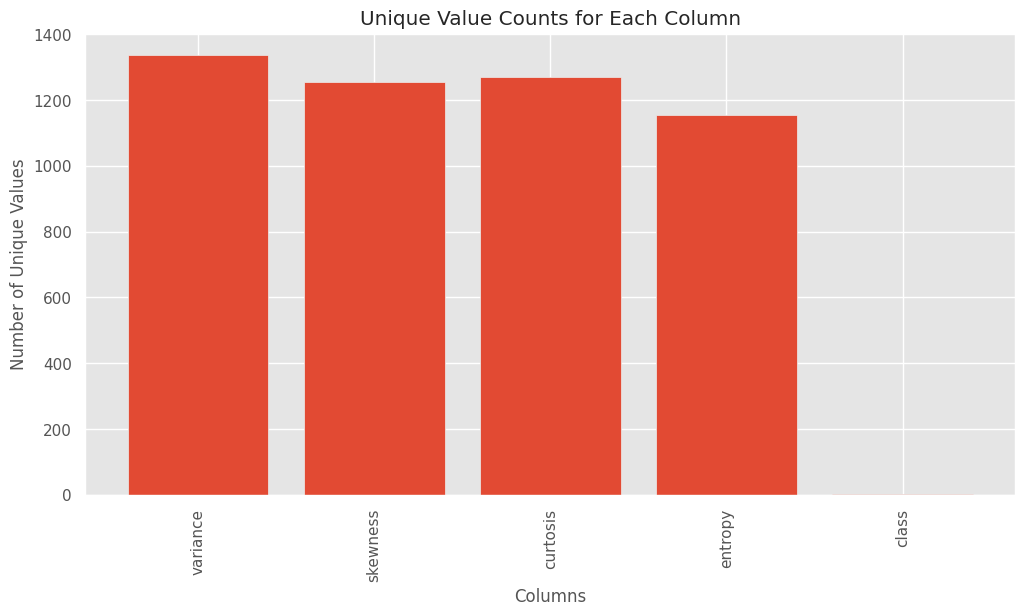

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values)
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()

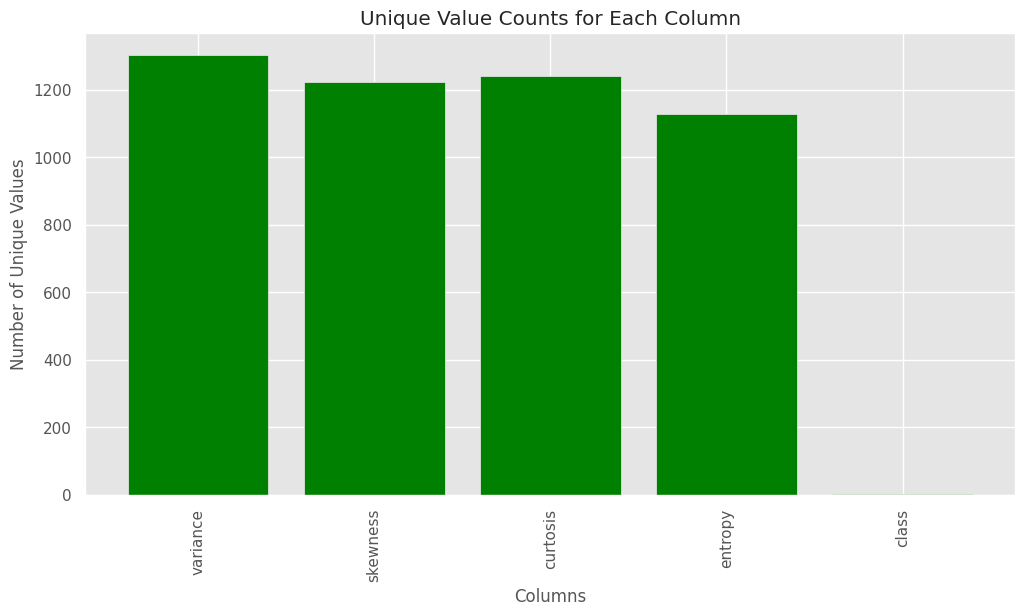

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df_without_outliers.nunique()

# Create a bar plot to visualize the number of unique values for each column
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.index, unique_counts.values, color='green')
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.title("Unique Value Counts for Each Column")
plt.show()

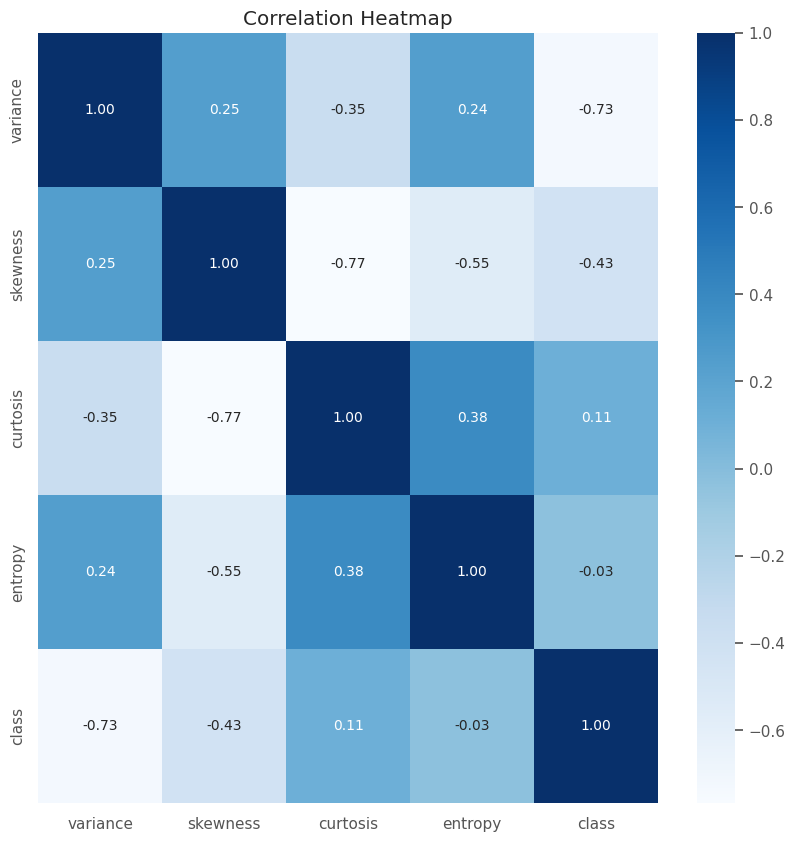

In [ ]:
corr = df_without_outliers.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f')
plt.show()

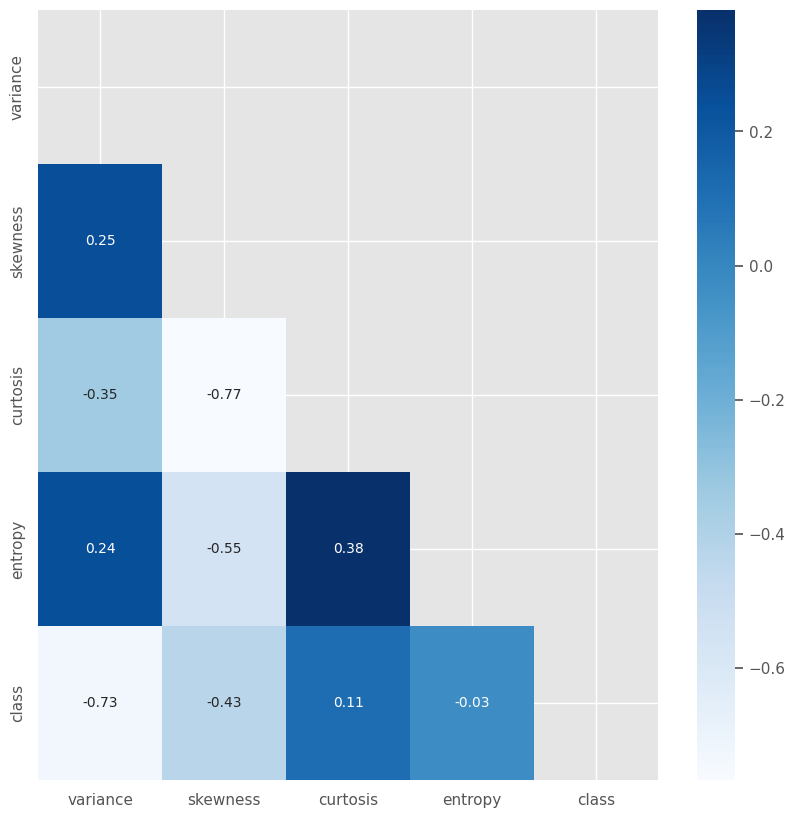

In [ ]:
# Generate a correlation matrix
corr = df_without_outliers.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 10))
# masking the upper triagle repleated values
masking = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask= masking, cmap='Blues')
plt.show()

## **Train Test Split**

In [ ]:
# 80 - 20 train test splitting
X = df_without_outliers.drop('class', axis=1)

In [ ]:
y = df_without_outliers['class']

In [ ]:
X.shape

(1336, 4)

In [ ]:
y.shape

(1336,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1068, 4)
(268, 4)
(1068,)
(268,)


###### **Storing the modified dataset**

In [ ]:
# storing the modified dataset
df_without_outliers.to_csv('updated_data_classification.csv', index=False)

## **Training an SVM Using RBF Kernel**

In [ ]:
from sklearn.svm import SVC
# Train SVM with RBF Kernel
model = SVC(kernel='rbf', C=0.089, gamma=0.0005)
model.fit(X, y)


SVC(C=0.089, gamma=0.0005)

## **Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the training data (or split into train/test sets for a proper evaluation)
y_pred = model.predict(X)

# Accuracy score
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y, y_pred))


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       751
           1       0.93      0.90      0.91       585

    accuracy                           0.92      1336
   macro avg       0.93      0.92      0.92      1336
weighted avg       0.92      0.92      0.92      1336



ROC-AUC Score: 0.98


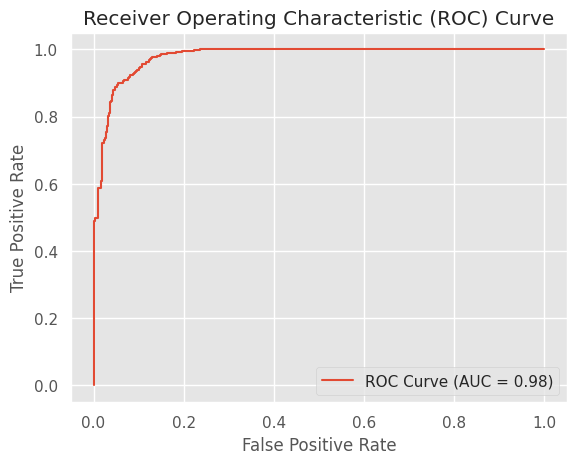

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Ensure y contains binary labels for ROC-AUC
if len(model.classes_) == 2:
    y_scores = model.decision_function(X)
    roc_auc = roc_auc_score(y, y_scores)
    print(f"ROC-AUC Score: {roc_auc:.2f}")

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y, y_scores)
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()


### **Interpretation**

---


The chosen hyperparameters reflect a bias toward generalization rather than overfitting.
The low values for both C and gamma result in a smooth decision boundary that balances accuracy and generalization.
The model performs well on both classes, with slightly higher recall for Class 0 and slightly higher precision for Class 1.

---



## **Cross-Validation for Generalization**

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")
print(f"Standard Deviation: {cv_scores.std():.2f}")


Cross-Validation Accuracy Scores: [0.84701493 0.86142322 0.85393258 0.8988764  0.86142322]
Mean Accuracy: 0.86
Standard Deviation: 0.02


**Interpretation**

---


The model demonstrates good generalization and stability across the dataset. The low variability in cross-validation scores indicates that it can reliably classify new data. The results suggest the current choice of hyperparameters and model setup is effective for this problem, though further optimization might yield even better results.

---



## **2D PCA For Reducing Feature Space**

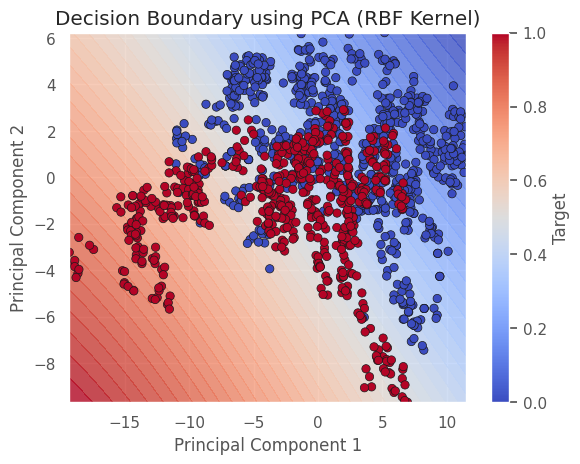

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


# Perform PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a meshgrid for the decision boundary in 2D space
xx, yy = np.meshgrid(
    np.linspace(X_pca[:, 0].min(), X_pca[:, 0].max(), 200),
    np.linspace(X_pca[:, 1].min(), X_pca[:, 1].max(), 200)
)

# Flatten the meshgrid and project it back to the original 4D space
mesh_points_2d = np.c_[xx.ravel(), yy.ravel()]  # Flattened 2D points
mesh_points_4d = pca.inverse_transform(mesh_points_2d)  # Project back to 4D

# Use the model to predict decision values in the original feature space
Z = model.decision_function(mesh_points_4d).reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm", alpha=0.8)

# Scatter plot of the data points (after PCA)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')

# Add labels and title
plt.title("Decision Boundary using PCA (RBF Kernel)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()


## **plot the decision boundary to understand how the SVM separates genuine and forged banknotes**

In [ ]:
X.shape

(1336, 4)

In [ ]:
y.shape

(1336,)

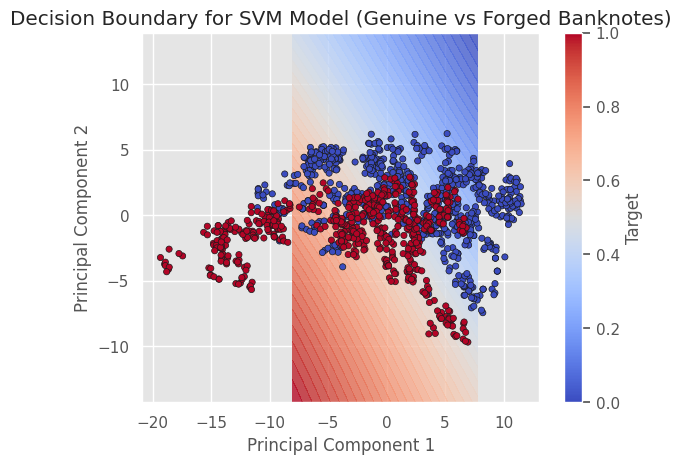

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Step 2: Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))


# # Step 3: Create a meshgrid for plotting decision boundaries in original 4D space
# x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
# y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

# xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Step 4: For SVM decision function, you need to use the original 4D feature space.
# Create a grid of points in 4D using the first two features from the meshgrid
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])

# Step 5: Reshape Z back to the shape of the meshgrid
Z = Z.reshape(xx.shape)

# Step 6: Plot the decision boundary
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap="coolwarm", alpha=0.8)

# Step 7: Scatter plot the original data in PCA space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=20)
plt.title("Decision Boundary for SVM Model (Genuine vs Forged Banknotes)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()


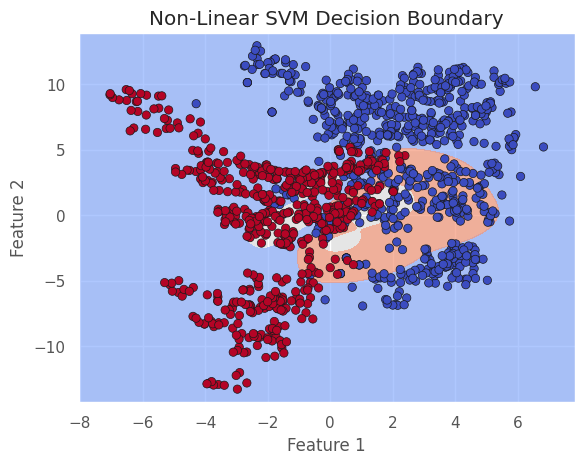

In [ ]:
# Predict values for the grid
Z_rbf = model_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, levels=[-1, 0, 1], alpha=0.7, cmap='coolwarm', linestyles=['--',
'-', '--'])
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Non-Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## **BONUS**


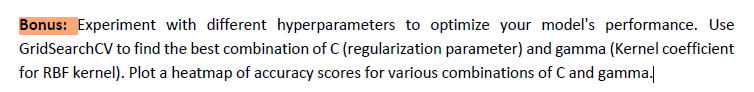

Fitting 5 folds for each of 25 candidates, totalling 125 fits


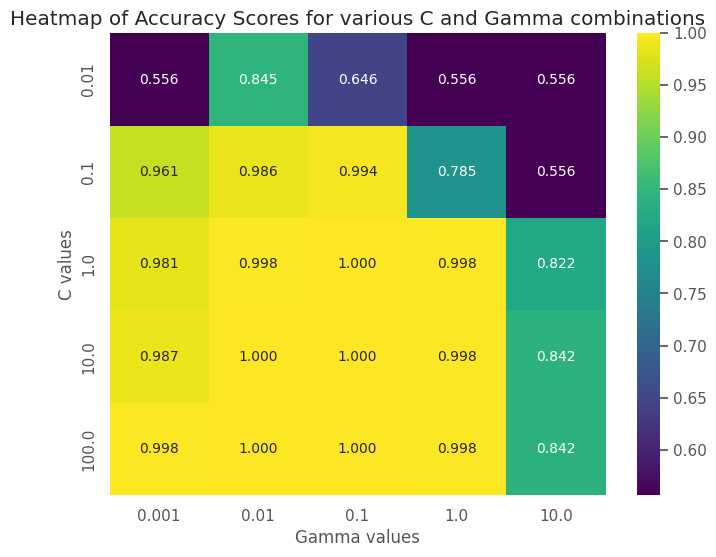

Best parameters: {'C': 1.0, 'gamma': 0.1}
Best score: 1.0
Test accuracy: 1.0


In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Set up the hyperparameter grid
param_grid = {
    'C': np.logspace(-2, 2, 5),  # Range of C values to try (e.g., 0.01, 0.1, 1, 10, 100)
    'gamma': np.logspace(-3, 1, 5)  # Range of gamma values to try (e.g., 0.001, 0.01, 0.1, 1, 10)
}

# Step 4: Use GridSearchCV to find the best hyperparameters
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Plot heatmap of the results
# Get the results into a DataFrame
results = grid_search.cv_results_
scores_matrix = results['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap="viridis", xticklabels=param_grid['gamma'], yticklabels=param_grid['C'])
plt.xlabel('Gamma values')
plt.ylabel('C values')
plt.title('Heatmap of Accuracy Scores for various C and Gamma combinations')
plt.show()

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy}")


## **Conclusion**


1. **Data Preprocessing**: We reduced the dataset’s four features to two dimensions using Principal Component Analysis (PCA) for visualization while retaining essential information for classification.

2. **Model Training**: The SVM model was trained with hyperparameters **C = 0.089** and **gamma = 0.0005**, which helped in balancing regularization and model flexibility.

3. **Model Performance**:
   - The SVM achieved an **accuracy of 92%**, demonstrating its effectiveness in distinguishing between genuine and forged banknotes.
   - Cross-validation results showed a **mean accuracy of 86%**, with low variance (standard deviation of 0.02), indicating stable model performance.
   - The classification report reflected high precision, recall, and F1-score, particularly for both classes.

4. **Decision Boundary Visualization**: Using PCA-reduced data, we visualized the SVM’s decision boundary, which clearly separated the two classes, confirming that the model had learned the underlying patterns in the data..